# MODEL OPTIMIZATION

In [48]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, RANSACRegressor
from sklearn.cross_validation import train_test_split, cross_val_score
from xgboost import XGBRegressor #faster version of gradient boosting regressor
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint

## OPTIMIZE MODELS

In [ ]:
with open('train_scores.plk','rb') as f:
    train_pickle = pickle.load(f)
    
with open('test_scores.plk','rb') as f:
    test_pickle = pickle.load(f)

In [8]:
def optimizer(name,*params):
    if name == 'Linear':
        k, model = 8, RANSACRegressor(base_estimator=LinearRegression(),max_trials=100,min_samples=params[0])
    elif name == 'Random Forest':
        k, model = 4, RandomForestRegressor(n_estimators=params[0],max_depth=params[1],random_state=42)
    elif name == 'Gradient Boost':
        k, model = 8, GradientBoostingRegressor(n_estimators=params[0],max_depth=params[1])
#         k, model = 8, XGBRegressor(n_estimators=params[0],max_depth=params[1]) #XG Boost (same as gradient boost)
    X = np.matrix(df.ix[:,:-1])[:,list(sbs_dict[name][k])][:500]
    y = np.array(df.ix[:,-1])[:500]
    X_std = StandardScaler().fit_transform(X)
    y_std = StandardScaler().fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X_std,y_std,test_size=0.25,random_state=42)
    results = model.fit(X_train,y_train)
    train_score = np.mean(cross_val_score(results,X_train,y_train,cv=8))
    test_score = results.score(X_test,y_test)
    return train_score, test_score

## LINEAR REGRESSION

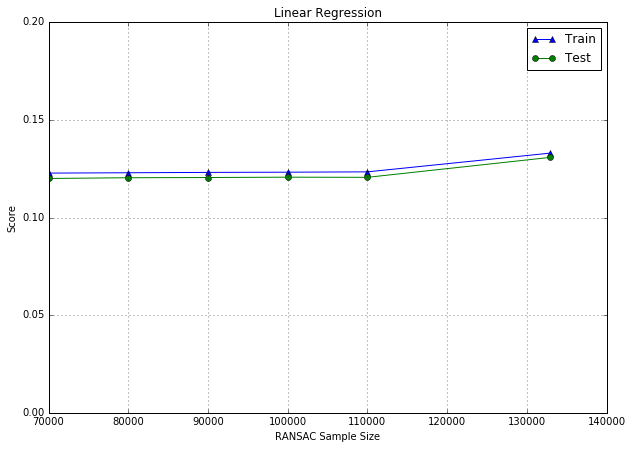

In [47]:
name = 'Linear'
param_list = train_pickle[name][0]
train_scores= train_pickle[name][1]
test_scores = test_pickle[name][1]
plt.figure(figsize=(10,7))
plt.plot(param_list,train_scores,marker='^')
plt.plot(param_list,test_scores,marker='o')
plt.legend(['Train','Test'],loc=0)
plt.title('Linear Regression')
plt.xlabel('RANSAC Sample Size')
plt.axis([70000,140000,0,0.2])
plt.ylabel('Score')
plt.grid(True)
plt.show()

## RANDOM FOREST

[20, 40, 60, 80, 100]
[array([ 0.04010479,  0.05908448,  0.08165475,  0.10453716,  0.13264063,
        0.85308669]), array([ 0.04032215,  0.05891103,  0.08146616,  0.10415089,  0.1322653 ,
        0.85975009]), array([ 0.04033409,  0.05912052,  0.0816457 ,  0.10433563,  0.13244944,
        0.86166095]), array([ 0.04034061,  0.05897687,  0.08163483,  0.10424303,  0.13225089,
        0.86259717]), array([ 0.04033516,  0.05896249,  0.08152186,  0.10410829,  0.13207134,
        0.86319505])]
[array([ 0.03776551,  0.05406429,  0.07678797,  0.09944242,  0.12876581,
        0.86634026]), array([ 0.03778458,  0.05471549,  0.07731616,  0.09947768,  0.12864872,
        0.87169683]), array([ 0.03768327,  0.05435609,  0.07748048,  0.09940684,  0.12856169,
        0.87324738]), array([ 0.03757413,  0.05414157,  0.07704068,  0.09883323,  0.127699  ,
        0.8740143 ]), array([ 0.03747812,  0.05418681,  0.07692758,  0.09872425,  0.12782298,
        0.87447316])]


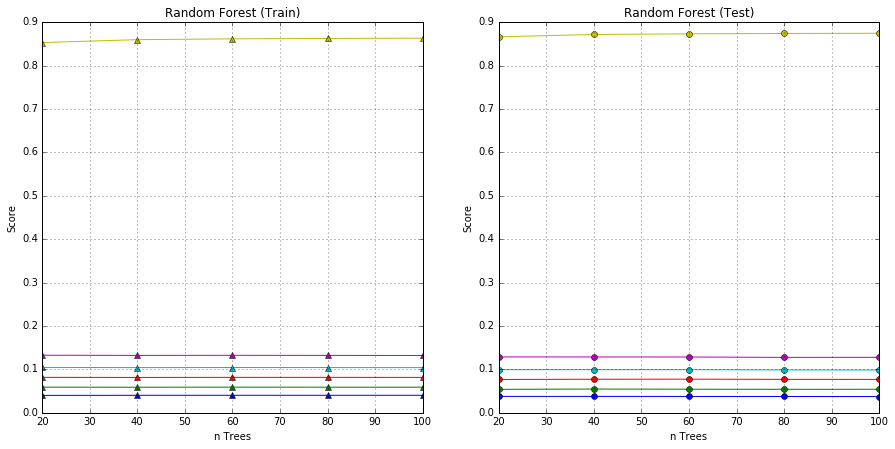

In [44]:
name = 'Random Forest'
param_list = train_pickle[name][0]
train_scores= train_pickle[name][1]
test_scores = test_pickle[name][1]

fig,axs = plt.subplots(nrows=1,ncols=2)
fig.set_figheight(7)
fig.set_figwidth(15)
ax = axs[0]
ax.plot(param_list,train_scores,marker='^')
# ax.legend(['n_depth={}'.format(n) for n in np.arange(1,max_depth+1,1)],loc=3)
ax.legend()
ax.set_title('Random Forest (Train)')
# ax.axis([min_trees,max_trees,0,0.2])
ax.set_xlabel('n Trees')
ax.set_ylabel('Score')
ax.grid(True)

ax = axs[1]
ax.plot(param_list,test_scores,marker='o')
# ax.legend(['n_depth={}'.format(n) for n in np.arange(1,max_depth+1,1)],loc=3)
ax.set_title('Random Forest (Test)')
# ax.axis([min_trees,max_trees,0,0.2])
ax.set_xlabel('n Trees')
ax.set_ylabel('Score')
ax.grid(True)

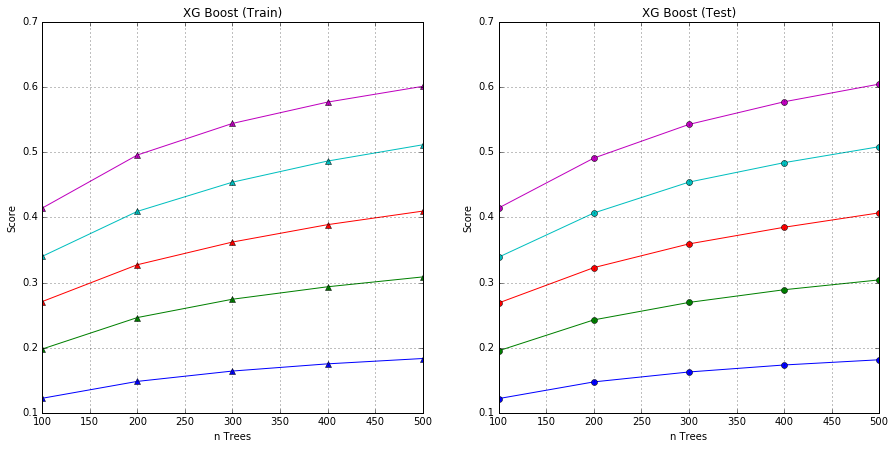

In [45]:
name = 'Gradient Boost'
param_list = train_pickle[name][0]
train_scores= train_pickle[name][1]
test_scores = test_pickle[name][1]


fig,axs = plt.subplots(nrows=1,ncols=2)
fig.set_figheight(7)
fig.set_figwidth(15)
ax = axs[0]
ax.plot(param_list,train_scores,marker='^')
# ax.legend(['n_depth={}'.format(n) for n in np.arange(min_depth,max_depth+1,1)],loc=3)
ax.set_title('XG Boost (Train)')
# ax.axis([min_trees,max_trees,0,1])
ax.set_xlabel('n Trees')
ax.set_ylabel('Score')
ax.grid(True)

ax = axs[1]
ax.plot(param_list,test_scores,marker='o')
# ax.legend(['n_depth={}'.format(n) for n in np.arange(min_depth,max_depth+1,1)],loc=3)
ax.set_title('XG Boost (Test)')
# ax.axis([min_trees,max_trees,0,1])
ax.set_xlabel('n Trees')
ax.set_ylabel('Score')
ax.grid(True)

## PICKLE MODEL

I like to pickle my models and/or anything that may be utilized in a production line later down the line.

In [54]:
df = pd.read_csv('data/wheat-2013-supervised-edited.csv')
drop_cols = ['Latitude','Longitude'] + [df.columns[0]]
df.drop(drop_cols,axis=1,inplace=True)

In [55]:
with open('SBS_feat_set.plk','rb') as f:
    sbs_dict = pickle.load(f)

In [56]:
models = {}
models['Linear'] = LinearRegression()
models['Random Forest'] = RandomForestRegressor(random_state=42)
models['Gradient Boost'] = XGBRegressor(n_estimators=500,max_depth=5)

In [57]:
for name,model in models.items():
    if name == 'Random Forest':
        k = 4
    else:
        k = 8
    X = np.matrix(df.ix[:,:-1])[:,list(sbs_dict[name][k])]
    y = np.array(df.ix[:,-1])
    X_std = StandardScaler().fit_transform(X)
    y_std = StandardScaler().fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X_std,y_std,test_size=0.25,random_state=42)
    trained_model = model.fit(X_train,y_train)
    with open('trained_model_{}.plk'.format(name),'wb') as f:
        pickle.dump(trained_model,f)

## References

https://www.researchgate.net/post/How_to_determine_the_number_of_trees_to_be_generated_in_Random_Forest_algorithm